# Finding Area of Earth's Landmass And Water Bodies



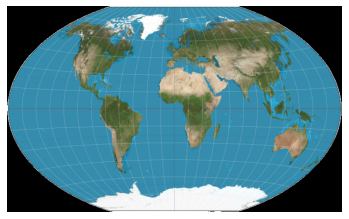

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

!wget -qO globe.png "https://storage.googleapis.com/codehub-data/1-A-8-1-globe.png"
image = cv2.imread('globe.png')
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

### Process `image` to form a mask of the globe

Process the coin image above to remove the background and isolate the globe. Use the fact that the background of the image is purely black. The resulting mask should be 0 for the background pixels and 255 for the pixels belonging to the globe.


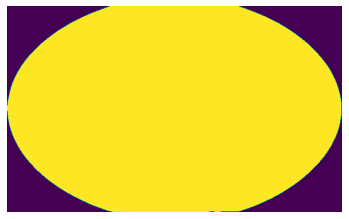

In [2]:
mask_globe = None

mask_globe = 255 - cv2.inRange(image, 0, 0)

plt.imshow(mask_globe)
plt.axis("off")
plt.show()


###  Process `image` to form a mask of ice caps
Process the original image to form a mask that shows the ice caps. The resulting mask should have zeros at all areas except around Antarctica and Greenland.


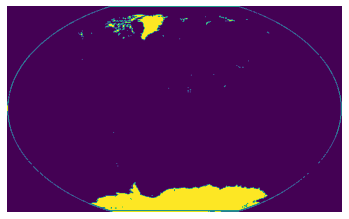

In [3]:
mask_ice = None
lower_white = np.array([195,195, 195])
upper_white = np.array([255,255,255])
mask_ice = cv2.inRange(image, lower_white, upper_white)
plt.imshow(mask_ice)
plt.axis('off')
plt.show()


###  Process `image` to form a mask of water bodies
Process the original image to form a mask that shows the water bodies. The resulting image should have zeros at all areas except at the visible water bodies like oceans and seas.


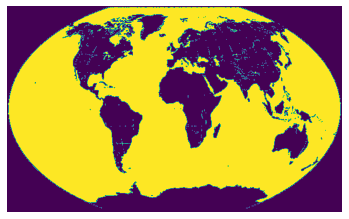

In [4]:
mask_water = None

lower_blue = np.array([0,10,115])
upper_blue = np.array([155,255,255])
mask_water = cv2.inRange(image, lower_blue, upper_blue)
plt.imshow(mask_water)
plt.axis('off')
plt.show()


### Process `image` to form a mask of land mass
Process the original image to form a mask that shows the land mass. The resulting image should have zeros at all areas except at the areas occupied by land. The land mass mask should not include the ice caps.



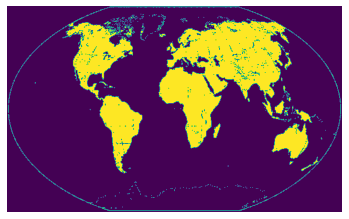

In [5]:
mask_land = None
mask_land = mask_globe -mask_water - mask_ice
plt.imshow(mask_land)
plt.axis('off')
plt.show()


### Estimate the areas of the land masses
Using the fact that the earth's total surface area is about 510 million square kilometers, estimate the area of the two surfaces from above in square kilometers.

In [6]:
AREA_OF_THE_EARTH = 510e6 # in sq. km

mask_globe_sum = np.count_nonzero(mask_globe)
each_pix = AREA_OF_THE_EARTH / mask_globe_sum

area_of_ice_caps = np.count_nonzero(mask_ice) * each_pix

print(area_of_ice_caps)
area_of_land_mass = np.count_nonzero(mask_land) * each_pix
print(area_of_land_mass)
area_of_water_bodies = np.count_nonzero(mask_water) * each_pix
print(area_of_water_bodies)

37527639.61360674
123790178.11381908
348682182.2725742


### Calculate the accuracy of your estimates
The following is the data for the surface area covered by land and water on earth. Calculate the accuracy of your estimates **in percentage**. For the land area, add the area estimates for land mass and ice caps.

* Land Area: 149 million $km^2$
* Water Area: 361 million $km^2$

In [7]:
total_land_area = 0
land_area_accuracy = 0
water_area_accuracy = 0

total_land_area = area_of_land_mass+area_of_ice_caps
land_area_accuracy = 100- np.abs((total_land_area -149e6)/149e6*100)
water_area_accuracy = 100- np.abs((area_of_water_bodies-361e6)/361e6*100)
print(land_area_accuracy, water_area_accuracy)


91.73300823662697 96.58786212536681
